<a href="https://colab.research.google.com/github/albertfast/Mountaincar_v0/blob/main/Mountaincar_v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Determined Car and the Wise Owl: A Journey to the Summit with Deep Q-Learning

```Python
Part 1: Desperate Beginning
```

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


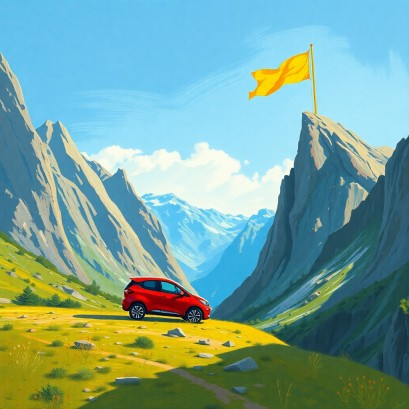

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from IPython.display import display, Image
miniRedCar = "/content/drive/MyDrive/ColabNotebooks/static/miniRedCar.jpg"
display(Image(filename=miniRedCar))

Our story begins with a little red car named Azimli (which means "Determined" in Turkish). Azimli has a big dream: to reach the waving yellow flag at the top of the mountain on the right side of the valley.

However, there's a problem. Azimli's engine isn't very powerful. It can't simply drive straight up the steep mountain. It tries and tries, accelerating as much as it can, but it always slides back down to the bottom of the valley. Azimli starts to feel hopeless.

Mounted at /content/drive


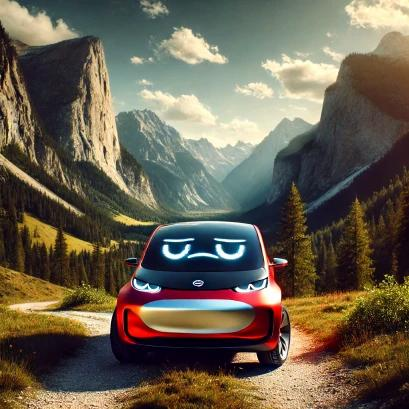

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from IPython.display import display, Image
frustratedCar = "/content/drive/MyDrive/ColabNotebooks/static/frustrated.jpg"
display(Image(filename=frustratedCar))

This is the classic **MountainCar-v0** environment from OpenAI's Gym library. Let's set it up!

# The Determined Car and the Wise Owl: A Journey to the Summit with Deep Q-Learning

```Python
Part 2: Meeting the Wise Owl
```

As the sun began to set, casting long shadows across the valley, Azimli was about to give up. Suddenly, a large, wise-looking owl swooped down and landed on a rock nearby. This was Bilge Baykuş (which means "Wise Owl" in Turkish), known throughout the mountains for its wisdom and knowledge.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


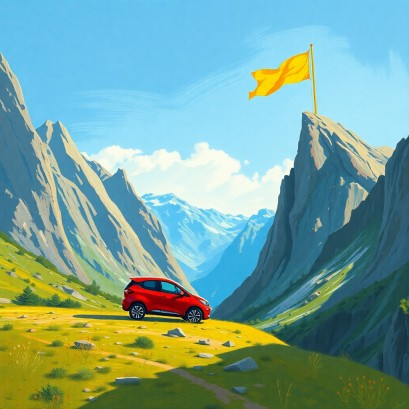

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from IPython.display import display, Image
miniRedCar = "/content/drive/MyDrive/ColabNotebooks/static/miniRedCar.jpg"
display(Image(filename=miniRedCar))

"I've been watching you, little car," hooted the owl.  "You have a strong spirit, but you need a better strategy.  I can help you."

Azimli, surprised and hopeful, looked up at the owl. "You can?  But how?  My engine just isn't powerful enough!"

Bilge Baykuş explained, "It's not about brute force, it's about *learning* the right way to move.  I will give you a special 'value table,' called a **Q-table**.  This table will tell you the *value* of taking each possible action in each possible situation."

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


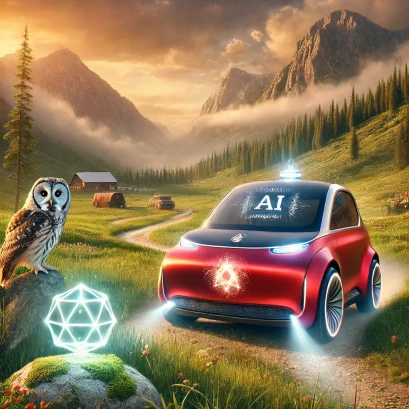

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from IPython.display import display, Image
miniRedCar = "/content/drive/MyDrive/ColabNotebooks/static/mycarabnowl.jpg"
display(Image(filename=miniRedCar))

"Think of each spot in the valley as a 'state' (s), and each direction you can push the accelerator (left, none, right) as an 'action' (a). The Q-table will store a number, called a Q-value (Q(s, a)), for each state-action pair. This Q-value represents the expected total reward you'll get if you start in that state, take that action, and then continue to act in the best way possible."

In [ ]:
import numpy as np

# For now, we'll represent the Q-table with a simple NumPy array.
# (Later, we'll replace this with a neural network.)
# We'll simplify the states and actions for this example.

# HYPOTHETICAL States (simplified for demonstration):
# s0: Position = -0.5, Velocity = 0 (Starting)
# s1: Position = -0.6, Velocity = -0.01 (Left)
# s2: Position = -0.4, Velocity = 0.01 (Right)
# s3: Position = 0.5, Velocity = 0 (Goal!)

# HYPOTHETICAL Actions:
# a0: Push left
# a1: Do nothing
# a2: Push right

num_states = 4
num_actions = 3

q_table = np.zeros((num_states, num_actions))  # Initialize all Q-values to 0

print("Initial Q-table:")
print(q_table)

Initial Q-table:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


**The Bellman Equation (The Owl's Wisdom):**

Bilge Baykuş continued, "The key to learning the best Q-values is the **Bellman Equation**."

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


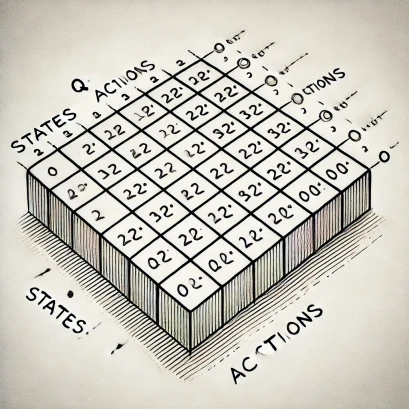

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from IPython.display import display, Image
miniRedCar = "/content/drive/MyDrive/ColabNotebooks/static/Bellman Equation.jpg"
display(Image(filename=miniRedCar))

The Bellman Equation looks like this:

$Q(s, a) = r + \gamma * \max_{a'} Q(s', a')$

Let's break it down:

*   **Q(s, a):** The Q-value we're trying to calculate (the expected total reward of taking action *a* in state *s*).
*   **r:** The *immediate* reward you get after taking action *a* in state *s*.
*   **γ (gamma):** The *discount factor*.  This is a number between 0 and 1 (e.g., 0.9). It determines how much we value future rewards compared to immediate rewards. A gamma of 0 means we only care about immediate rewards. A gamma of 1 means we value future rewards just as much as immediate rewards.
*   **s':** The *next* state you end up in after taking action *a* in state *s*.
*   **a':**  *Any* possible action you could take in the next state (s').
*   **max<sub>a'</sub> Q(s', a'):**  The *maximum* Q-value you can get in the next state (s'). This represents the best possible action you could take in that next state.

**Numerical Example (One Step of Q-learning):**

Let's see how this works with a single step:

1.  **Current State (s):** Azimli is at the starting position (`s0`).
2.  **Action (a):**  Azimli randomly chooses to push right (`a2`).  (Initially, since all Q-values are 0, any action is equally likely.  This is called *exploration*.)
3.  **Reward (r) and Next State (s'):** Azimli moves slightly to the right, ending up in state `s2`. The reward is -1 (because every step costs a little bit of energy).
4.  **Q-Value Update:** We now use the Bellman Equation to update the Q-value for the original state and action, Q(s0, a2):

    $Q(s_0, a_2) = r + \gamma * \max_{a'} Q(s_2, a')$

    $Q(s_0, a_2) = -1 + 0.9 * \max(Q(s_2, a_0), Q(s_2, a_1), Q(s_2, a_2))$

    Since all the Q-values for `s2` are still 0 (from our initial table):

    $Q(s_0, a_2) = -1 + 0.9 * 0 = -1$

Now, we update the Q-table:

| State/Action | a0 (Left) | a1 (None) | a2 (Right) |
|--------------|-----------|-----------|------------|
| s0           | 0         | 0         | -1         |
| s1           | 0         | 0         | 0          |
| s2           | 0         | 0         | 0          |
| s3           | 0         | 0         | 0          |

In [ ]:
# One step of Q-learning (using the example above)

current_state = 0  # s0
action = 2       # a2
reward = -1
next_state = 2    # s2
gamma = 0.9

# Bellman Equation update
q_table[current_state, action] = reward + gamma * np.max(q_table[next_state])

print("Updated Q-table:")
print(q_table)

Updated Q-table:
[[ 0.  0. -1.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


🛠️ Environment Setup

Below are the commands required to set up the Python environment and install necessary libraries for the MountainCar simulation:

In [ ]:
import gymnasium as gym
import numpy as np

env = gym.make("MountainCar-v0")
state, _ = env.reset(seed=42) # Added seed for reproducibility
print(f"Initial state: {state}")

# Get the shape of the observation space
print(f"Observation Space: {env.observation_space}")


#get the possible actions
print(f"Action Space: {env.action_space}")

Initial state: [-0.4452088  0.       ]
Observation Space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
Action Space: Discrete(3)


**Explanation:**

*   `gym.make("MountainCar-v0")`: This line creates the MountainCar environment. It's like setting up the valley, the mountains, and the car, ready for Azimli to start trying.
*   `state, _ = env.reset(seed=42)`: This line places Azimli at the starting position in the valley. The `state` variable now holds two important pieces of information:
    *   **Position:** Azimli's horizontal position along the valley floor. The starting position is usually around -0.5. The goal is to reach a position of 0.5 or greater.
    *   **Velocity:** Azimli's speed. At the start, the velocity is 0.
    * I added `seed=42`. This number could have been any integer. By setting a seed, we can reproduce the same results.

*   `env.observation_space`: This tells us the range of possible values for the position and velocity:
    *   Position is between -1.2 and 0.6.
    *   Velocity is between -0.07 and 0.07.

*   `env.action_space`: `Discrete(3)` means there are three possible actions:
    *   `0`: Push left
    *   `1`: Do nothing
    *   `2`: Push right

**The Challenge (Physics):**

The car's engine is weaker than the force of gravity pulling it down the slope. The key to success is to build up momentum by rocking back and forth. Simply accelerating in one direction won't work.

**Let's think about this mathematically (introducing Q-values):**

Even though we won't use a Q-table *yet* (we'll get to the "Bilge Baykuş" and the neural network later), it's helpful to start thinking about the concept of **Q-values**.

A Q-value, written as  $Q(s, a)$, represents the "quality" of taking a specific action (a) in a specific state (s). It's the *expected* total reward you'll get if you start in state *s*, take action *a*, and then continue acting optimally from that point on.

Let's illustrate with a *simplified, hypothetical* example (not exactly how MountainCar works, but good for understanding):

*   **States:**
    *   `s0`: Position = -0.5, Velocity = 0 (Starting position)
    *   `s1`: Position = -0.6, Velocity = -0.01 (Slightly to the left)
    *   `s2`: Position = -0.4, Velocity = 0.01 (Slightly to the right)
*   **Actions:**
    *   `a0`: Push left
    *   `a1`: Do nothing
    *   `a2`: Push right
*   **Rewards:**
    *   Reach the goal (position >= 0.5): +10
    *   All other steps: -1
*   **Gamma (Discount Factor):** 0.9 (This makes future rewards slightly less valuable than immediate rewards).

**Hypothetical Q-table (initially):**

| State/Action | a0 (Left) | a1 (None) | a2 (Right) |
|--------------|-----------|-----------|------------|
| s0           | 0         | 0         | 0          |
| s1           | 0         | 0         | 0          |
| s2           | 0         | 0         | 0          |

**One Step of Q-learning (Illustrative):**

1.  **Current State:** `s0`
2.  **Action:** Let's say Azimli randomly chooses `a2` (push right).
3.  **Next State and Reward:** Azimli moves to `s2` and receives a reward of -1.
4.  **Q-Value Update (Bellman Equation):**

    $Q(s_0, a_2) = r + \gamma * \max_{a'} Q(s_2, a')$

    $Q(s_0, a_2) = -1 + 0.9 * \max(Q(s_2, a_0), Q(s_2, a_1), Q(s_2, a_2))$

    Since all Q-values in the table are currently 0:

    $Q(s_0, a_2) = -1 + 0.9 * 0 = -1$

**Updated Hypothetical Q-table:**

| State/Action | a0 (Left) | a1 (None) | a2 (Right) |
|--------------|-----------|-----------|------------|
| s0           | 0         | 0         | -1         |
| s1           | 0         | 0         | 0          |
| s2           | 0         | 0         | 0          |

This is just *one* tiny step. Q-learning involves repeating this process many, many times, gradually improving the Q-value estimates. The Bellman equation is the core idea: the value of taking an action in a state is the immediate reward plus the discounted value of the *best* action you can take in the *next* state.

**Key Takeaway:** Even though Azimli is struggling now, the concept of Q-values (and later, the DQN) provides a way to learn the best actions to take in each state, eventually leading to success.

This is just *one* tiny step!  Q-learning involves repeating this process over and over, with Azimli trying different actions and exploring the valley.  Each time, the Q-values get updated, gradually getting closer and closer to the *true* values that represent the best possible strategy.

**Important Concepts Introduced:**

*   **Q-table:** A table that stores the estimated values (Q-values) of taking each action in each state.
*   **Q-value (Q(s, a)):** The expected total reward of taking a specific action in a specific state.
*   **Bellman Equation:**  The core equation that updates Q-values based on immediate rewards and the best possible future rewards.
*   **Gamma (γ):** The discount factor, controlling the importance of future rewards.
* **Exploration vs Exploitation**: Initially the agent explores (doing random actions), after sometime, it starts to exploit (doing the best action in the Q(s,a)

In the next part, we'll see how Bilge Baykuş helps Azimli remember these experiences using a "memory book" (the Replay Buffer)!

After explaining the Q-table and the Bellman equation, Bilge Baykuş said, "These initial trials are very important. But it's too difficult to remember everything. That's why I'm giving you a notebook. You will record your experiences in this notebook."

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


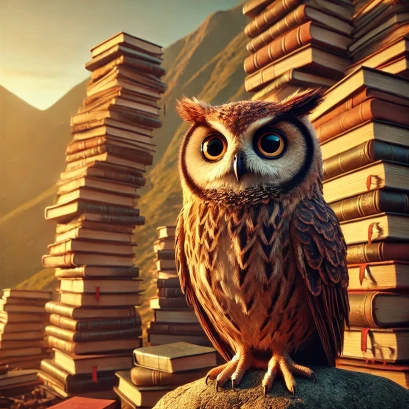

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from IPython.display import display, Image
miniRedCar = "/content/drive/MyDrive/ColabNotebooks/static/bookandOwl.jpg"
display(Image(filename=miniRedCar))


"We will call this notebook the **Replay Buffer**. After each trial, you will write down the following:

1.  **State (s):** Your current position and velocity (e.g., `[-0.5, 0.0]`).
2.  **Action (a):** The action you took (push left, do nothing, push right).
3.  **Reward (r):** The reward you received after taking that action (usually -1, with a large reward for reaching the goal).
4.  **Next State (s'):** The *new* position and velocity you reached after taking that action.
5.  **Done (done):** A flag indicating whether you reached the goal (True/False). `True` if you reached the goal, `False` otherwise."

Bilge Baykuş added, "This notebook will allow you to learn from your past experiences *repeatedly*. You'll open random pages and review those experiences. This will help you learn faster and prevent you from forgetting!"

It will be as if the car is talking to its past self. It will learn from its past mistakes and repeat good actions.

**Why is Experience Replay Important?**

*   **Efficiency:** Each experience can be used multiple times for learning, instead of just once.
*   **Breaking Correlations:** If we learn from experiences in the order they happen, they are highly correlated. This can make learning unstable. By randomly sampling from the buffer, we break these correlations.
*   **Learning from Rare Events:** Some experiences (like reaching the goal) are rare. The replay buffer lets us learn from these rare events more often.

In [ ]:
import random

class ReplayBuffer:
    def __init__(self, capacity):
        self.capacity = capacity  # Maximum number of experiences to store
        self.buffer = []          # The list to store experiences
        self.position = 0         # Current position to insert

    def add(self, state, action, reward, next_state, done):
        """Adds a new experience to the buffer."""
        if len(self.buffer) < self.capacity:
            self.buffer.append(None)  # Make space if not full
        self.buffer[self.position] = (state, action, reward, next_state, done)
        self.position = (self.position + 1) % self.capacity  # Cycle through

    def sample(self, batch_size):
        """Randomly samples a batch of experiences from the buffer."""
        return random.sample(self.buffer, batch_size)

    def __len__(self):
        """Returns the number of experiences currently stored."""
        return len(self.buffer)


# Create a Replay Buffer with a capacity of 1000 (we can store 1000 experiences)
replay_buffer = ReplayBuffer(1000)

# Example: Add a few experiences (these are just examples, not real gameplay)
replay_buffer.add([-0.5, 0.0], 2, -1, [-0.4, 0.01], False)  # (state, action, reward, next_state, done)
replay_buffer.add([-0.4, 0.01], 2, -1, [-0.3, 0.02], False)
replay_buffer.add([-0.3, 0.02], 0, -1, [-0.3, 0.0], False) # Do nothing
replay_buffer.add([-0.3, 0.0], 1, -1, [-0.4, -0.01], False)
replay_buffer.add([-0.4, -0.01], 0, -1, [-0.4, 0.0], False) # Do nothing

# Sample a batch of 3 experiences
batch = replay_buffer.sample(3)
print("Sampled Batch:")
print(batch)

# Show the current contents of the buffer
print("\nFull Buffer Contents (up to current position):")
print(replay_buffer.buffer[:replay_buffer.position])  # Only show filled slots

print(f"\nNumber of elements in buffer: {len(replay_buffer)}")

Sampled Batch:
[([-0.3, 0.02], 0, -1, [-0.3, 0.0], False), ([-0.4, -0.01], 0, -1, [-0.4, 0.0], False), ([-0.3, 0.0], 1, -1, [-0.4, -0.01], False)]

Full Buffer Contents (up to current position):
[([-0.5, 0.0], 2, -1, [-0.4, 0.01], False), ([-0.4, 0.01], 2, -1, [-0.3, 0.02], False), ([-0.3, 0.02], 0, -1, [-0.3, 0.0], False), ([-0.3, 0.0], 1, -1, [-0.4, -0.01], False), ([-0.4, -0.01], 0, -1, [-0.4, 0.0], False)]

Number of elements in buffer: 5


**Explanation of the Code:**

*   **`ReplayBuffer` Class:** This class represents our "notebook."
    *   `__init__(self, capacity)`: The constructor. It creates an empty list called `buffer` to store the experiences. `capacity` is the maximum number of experiences we can store.
    *   `add(self, state, action, reward, next_state, done)`: This method adds a *single* experience (a tuple) to the buffer. It uses `self.position` to keep track of where to add the next experience. If the buffer is full, it overwrites the oldest experience (circular buffer).
    *   `sample(self, batch_size)`: This method randomly selects a `batch_size` number of experiences from the buffer and returns them. This is the "randomly opening pages" part.
    *   `__len__(self)`: Returns how many elements are in the array.

*   **Example Usage:**
    *   We create a `ReplayBuffer` with a capacity of 1000.
    *   We add a few *example* experiences (these are not from real gameplay, just to show how it works).
    *   We sample a batch of 3 experiences and print it.
    *   We print the entire buffer (up to the current position).
     *   We print the number of elements in the buffer.

In the training loop, the agent will interact with the environment, get a new experience, and add it to the `ReplayBuffer`. Then, periodically, we'll sample a batch of experiences from the buffer and use those experiences to update the Q-values (using the Bellman Equation). This is how the agent learns from its past experiences, even the ones that happened a long time ago!

Next, we'll talk about the "magic stone" (the neural network) that Bilge Baykuş will use to help Azimli, instead of a simple Q-table. This is where Deep Q-Network (DQN) comes in!

After giving Azimli the notebook to record experiences, Bilge Baykuş said, "This notebook will be very useful. But there are so many different situations in the valley. It would be very difficult to write them all down in this notebook."

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


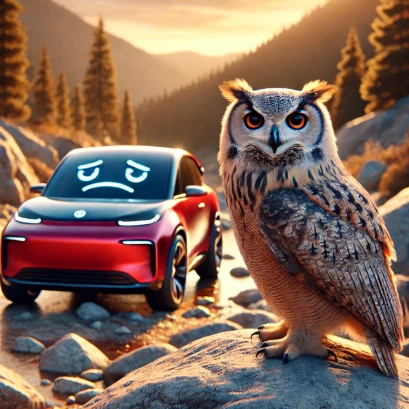

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from IPython.display import display, Image
frustratedCar = "/content/drive/MyDrive/ColabNotebooks/static/ Q-values.jpg"
display(Image(filename=frustratedCar))

That's why I'm going to give you an even better tool: A magic stone!"
Azimli looked at the stone with surprise. "Magic? What will this stone do?"

Bilge Baykuş explained, "This stone is a **Deep Neural Network** (DNN). It's a much more powerful version of the Q-table. The Q-table stored a *single number* for each state and action. But this stone can *calculate* the *estimated* Q-values for each action, taking any state as input."

"So," the owl continued, "this stone can *generalize from experiences*. Even in a situation it has never seen before, it can *predict which action might be better* based on its past experiences."

**Why a Neural Network Instead of a Q-table?**

*   **Generalization:** A neural network can generalize from seen states to unseen states. It can make educated guesses about new situations. A Q-table can only store values for states it has *exactly* seen before.
*   **Scalability:** MountainCar has a *continuous* state space (position and velocity can be any number within a range). A Q-table would need an infinite number of rows to represent all possible states! A neural network can handle continuous states.
*   **Complexity:** Real-world problems are often too big and too complex. A simple Q-table is not good enough.

**How Does the Neural Network Work?**

1.  **Input:** The current state (position and velocity) is fed into the network as a set of numbers.
2.  **Hidden Layers:** The input goes through several "hidden layers" of interconnected "neurons." Each neuron performs a simple calculation and passes the result to the next layer. These layers learn complex patterns and relationships between the input and the output.
3.  **Output:** The final layer produces a set of Q-values, one for each possible action.
4.  **Best Action:** The agent will choose the action with the highest Q-value.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from IPython.display import display, Image
diagram = "/content/drive/MyDrive/ColabNotebooks/static/diagram.jpg"
display(Image(diagram=miniRedCar))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


TypeError: Image.__init__() got an unexpected keyword argument 'diagram'

**Mathematical Representation:**

Instead of `Q(s, a)`, we now write `Q(s, a; θ)`.

*   **θ (theta):** Represents the *weights* of the neural network. These are the numbers that the network learns during training. They determine how the network transforms the input into the output.

The network is a *function approximator*. It's trying to *approximate* the true Q-function, but it's doing it with a neural network instead of a table.

In [ ]:
import torch
import torch.nn as nn

class DQN(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(DQN, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(state_dim, 64),  # Input layer to first hidden layer
            nn.ReLU(),                 # Activation function (ReLU)
            nn.Linear(64, 64),        # Second hidden layer
            nn.ReLU(),                 # Activation function (ReLU)
            nn.Linear(64, action_dim)  # Output layer
        )

    def forward(self, x):
        """
        Forward pass through the network.

        Args:
            x (torch.Tensor): The input state (as a tensor).

        Returns:
            torch.Tensor: The Q-values for each action.
        """
        return self.network(x)

# Example: Create a DQN
state_dim = 2  # MountainCar has 2 state variables (position, velocity)
action_dim = 3 # MountainCar has 3 actions (left, none, right)

model = DQN(state_dim, action_dim)

# Example: Get Q-values for a sample state
sample_state = torch.tensor([-0.5, 0.0], dtype=torch.float32)  # Example state
q_values = model(sample_state)
print("Sample Q-values:", q_values)

# Get the action with the highest Q-value
best_action = torch.argmax(q_values).item()
print("Best Action:", best_action)

**Explanation of the Code:**

*   **`DQN` Class:** This class defines our neural network.
    *   `__init__(self, state_dim, action_dim)`: The constructor. It sets up the network's architecture.
        *   `nn.Linear(input_dim, output_dim)`: Creates a *linear layer* (a fully connected layer). This layer takes `input_dim` inputs and produces `output_dim` outputs. The weights and biases of this layer are learned during training.
        *   `nn.ReLU()`: This is the *activation function*. ReLU stands for "Rectified Linear Unit." It's a simple function that introduces non-linearity into the network. It takes a number as input, and if the number is positive, it returns the number. If the number is negative, it returns 0. This non-linearity allows the network to learn complex relationships.
        *   `nn.Sequential(...)`: This combines the layers into a single network.
    *   `forward(self, x)`: This method defines how the input `x` (the state) is processed by the network to produce the output (the Q-values). It's called the "forward pass."

*   **Example Usage:**
    *   `state_dim = 2`: MountainCar has two state variables (position and velocity).
    *   `action_dim = 3`: MountainCar has three actions.
    *   `model = DQN(state_dim, action_dim)`: We create an instance of our `DQN` class.
    *   `sample_state = torch.tensor([-0.5, 0.0], dtype=torch.float32)`: We create a sample state (as a PyTorch tensor). Note: PyTorch uses tensors instead of NumPy arrays. `dtype=torch.float32` specifies that the numbers are 32-bit floating-point numbers.
    *   `q_values = model(sample_state)`: We pass the sample state through the network to get the Q-values for each action.
    *   `best_action = torch.argmax(q_values).item()`: We use argmax to find the action with the highest Q-value. `.item()` is converting the tensor to python number.

**Key Points:**

*   The neural network takes the state as input and outputs Q-values for each action.
*   The network has "hidden layers" that allow it to learn complex relationships.
*   The `ReLU` activation function introduces non-linearity.
*   The weights of the network (θ) are learned during training.

Now that we have our DQN (the "magic stone"), we need to explain how Bilge Baykuş will *train* it. The next part will cover the training process, including the loss function and optimization!

"Now that you have the magic stone," said Bilge Baykuş, "we need to train it. This stone is powerful, but it needs to learn from experience, just like you."

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from IPython.display import display, Image
funcition = "/content/drive/MyDrive/ColabNotebooks/static/funcition.jpg"
display(Image(filename=funcition))

"The training process is like practicing in the valley.  We'll repeat these steps many times:"

1.  **Explore or Exploit (Keşfetmek veya Kullanmak):**
    *   "Sometimes, you'll try a *random* action, just to see what happens.  This is called *exploration*. It helps you discover new possibilities."
    *   "Other times, you'll use the stone to choose the *best* action you know so far. This is called *exploitation*.  It helps you use what you've already learned."
    *   "At first, you'll explore *more* often.  As you learn, you'll explore *less* and exploit *more*."
    *   The balance between exploration and exploitation managed by a parameter called `epsilon`.

2.  **Take Action and Observe (Hareket Et ve Gözlemle):**
    *   "You'll take the chosen action in the valley and see what happens."
    *   "You'll observe the *new state* (your new position and velocity) and the *reward* you receive."
    *   "You'll also note whether you reached the goal (*done*)."

3.  **Store the Experience (Deneyimi Sakla):**
    *   "You'll write down the experience (state, action, reward, next state, done) in your notebook (the Replay Buffer)."

4.  **Learn from Past Experiences (Geçmiş Deneyimlerden Öğren):**
    *   "Every so often, we'll take a *random sample* of experiences from the notebook (a 'mini-batch')."
    *   "We'll use these experiences to update the 'magic stone' (the DQN)."
    *   "The key is the **Bellman Equation**, which we talked about before.  We'll use it to calculate a *target* Q-value."
        *   $y_i = r_i + \gamma * \max_{a'} Q(s'_i, a'; θ^-)$
        * Remember `θ^-` is the parameter for target network.
    *   "Then, we'll compare the *target* Q-value to the Q-value that the stone *predicted* for that state and action. The difference between these two is the **loss**."
        *   Loss Function (MSE - Mean Squared Error): $L(\theta) = \mathbb{E}[(y_i - Q(s_i, a_i; \theta))^2]$
    *    By using a loss function, we want to minimize the loss.
    *   "We'll use a process called *gradient descent* to adjust the stone's 'weights' (θ) to reduce this loss. This makes the stone's predictions more accurate."

5.  **Update the Target Network (Hedef Ağı Güncelle):**
    *   "Remember the owl's twin? We'll periodically copy the weights from the main network (the 'policy network') to the 'target network'. This makes the training process more stable."
    * There are two ways for updating target network:
      * Hard Update : Copy all weights.
      * Soft Update : $θ^- = τ * θ + (1 - τ) * θ^-$

6. **Repeat (Tekrar):** "We'll repeat these steps many, many times, until the stone becomes wise enough to guide you to the top of the mountain!"


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from IPython.display import display, Image
smart = "/content/drive/MyDrive/ColabNotebooks/static/smart.jpg"
display(Image(filename=smart))
# **(Image: Azimli practicing in the valley, with the owl watching and the stone glowing brighter.)**

**Key Concepts:**

*   **Epsilon-Greedy Strategy:** A way to balance exploration and exploitation.  We start with a high epsilon (more exploration) and gradually decrease it (more exploitation).
*   **Loss Function (MSE):** Measures the difference between the predicted Q-value and the target Q-value.
*   **Gradient Descent:** An optimization algorithm that adjusts the network's weights to minimize the loss.
*   **Target Network:** A copy of the main network, used to calculate target Q-values, making training more stable.

In [ ]:
import torch.optim as optim

# --- (Previous code: ReplayBuffer and DQN classes) ---
# Assuming ReplayBuffer and DQN classes are defined as before.

def train_mountaincar(lr=0.001, batch_size=64, episodes=500, gamma=0.99,
                     eps_start=1.0, eps_end=0.01, eps_decay=0.995,
                     target_update=10):
    """
    Trains a DQN agent to solve the MountainCar-v0 environment.

    Args:
        lr: Learning rate.
        batch_size: Number of experiences to sample from the replay buffer.
        episodes: Number of episodes to train for.
        gamma: Discount factor.
        eps_start: Initial epsilon value (for exploration).
        eps_end: Minimum epsilon value.
        eps_decay: Epsilon decay rate.
        target_update: How often to update the target network (in episodes).
    """

    env = gym.make("MountainCar-v0")
    state_dim = env.observation_space.shape[0]
    action_dim = env.action_space.n

    policy_net = DQN(state_dim, action_dim).to(device)  # Main network
    target_net = DQN(state_dim, action_dim).to(device)  # Target network
    target_net.load_state_dict(policy_net.state_dict()) # Initialize target_net
    target_net.eval() # We don't train the target_net

    optimizer = optim.Adam(policy_net.parameters(), lr=lr) # Adam Optimizer
    criterion = nn.MSELoss()  # Mean Squared Error loss function
    replay_buffer = ReplayBuffer(10000)  # Replay buffer

    epsilon = eps_start
    rewards_per_episode = []

    for episode in range(episodes):
        state, _ = env.reset()
        state = torch.tensor(state, dtype=torch.float32, device=device).unsqueeze(0) # Need to add a batch dimension. unsqueeze(0)
        total_reward = 0
        done = False

        while not done:
            # 1. Epsilon-Greedy Action Selection
            if random.random() > epsilon:
                with torch.no_grad(): # No need to calculate gradients when choosing the action with the policy network.
                    action = policy_net(state).max(1)[1].view(1, 1) # Choose the best action
            else:
                action = torch.tensor([[env.action_space.sample()]], device=device, dtype=torch.long) # Choose a random action

            # 2. Take Action and Observe
            next_state, reward, done, _, _ = env.step(action.item()) # action.item() converts the tensor to a Python number
            total_reward += reward

            next_state = torch.tensor(next_state, dtype=torch.float32, device=device).unsqueeze(0)


            # 3. Store Experience
            # We need to convert `done` to a tensor, so we can use it in calculations
            done_tensor = torch.tensor([done], device=device, dtype=torch.bool)
            replay_buffer.add(state, action, reward, next_state, done_tensor)

            # Move to the next state
            state = next_state

            # 4. Learn from Experiences
            if len(replay_buffer) > batch_size:  # Start learning after collecting some experiences
                experiences = replay_buffer.sample(batch_size)
                # Convert list of tuples to separate tensors
                states, actions, rewards, next_states, dones = zip(*experiences)

                states = torch.cat(states) #Concatenate
                actions = torch.cat(actions)
                rewards = torch.tensor(rewards, device=device)
                next_states = torch.cat(next_states)
                dones = torch.cat(dones)

                # Get Q-values for the current states and actions
                current_q_values = policy_net(states).gather(1, actions) # We select the q values of actions.
                # Compute the target Q-values
                next_q_values = target_net(next_states).max(1)[0]  # Get max Q-value for the next state
                target_q_values = rewards + (gamma * next_q_values * (~dones)) # ~dones means not dones.

                # Calculate the loss
                loss = criterion(current_q_values, target_q_values.unsqueeze(1))

                # Optimize the model
                optimizer.zero_grad() # Sets gradients to zero. Because, gradients are accumulated.
                loss.backward()      # Computes the gradients.
                optimizer.step()     # Updates the weights of the network.

        # 5. Update Target Network (every 'target_update' episodes)
        if episode % target_update == 0:
            target_net.load_state_dict(policy_net.state_dict()) # Hard update

        # Epsilon decay
        epsilon = max(eps_end, epsilon * eps_decay)
        rewards_per_episode.append(total_reward)
        print(f"Episode {episode+1}/{episodes}, Reward: {total_reward}, Epsilon: {epsilon:.3f}")

    env.close()
    print('Complete')
    return rewards_per_episode

# Example Usage:  Train the agent
rewards = train_mountaincar()

# Plot the rewards
import matplotlib.pyplot as plt
plt.plot(rewards)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("MountainCar Training Progress")
plt.show()

Episode 1/500, Reward: -43378.0, Epsilon: 0.995
Episode 2/500, Reward: -13191.0, Epsilon: 0.990
Episode 3/500, Reward: -22043.0, Epsilon: 0.985
Episode 4/500, Reward: -38462.0, Epsilon: 0.980
Episode 5/500, Reward: -10099.0, Epsilon: 0.975
Episode 6/500, Reward: -14848.0, Epsilon: 0.970
Episode 7/500, Reward: -79594.0, Epsilon: 0.966
Episode 8/500, Reward: -5098.0, Epsilon: 0.961
Episode 9/500, Reward: -21560.0, Epsilon: 0.956
Episode 10/500, Reward: -115257.0, Epsilon: 0.951
Episode 11/500, Reward: -8602.0, Epsilon: 0.946
Episode 12/500, Reward: -45881.0, Epsilon: 0.942
Episode 13/500, Reward: -4509.0, Epsilon: 0.937
Episode 14/500, Reward: -14466.0, Epsilon: 0.932
Episode 15/500, Reward: -18067.0, Epsilon: 0.928
Episode 16/500, Reward: -64472.0, Epsilon: 0.923
Episode 17/500, Reward: -28479.0, Epsilon: 0.918
Episode 18/500, Reward: -2636.0, Epsilon: 0.914
Episode 19/500, Reward: -110909.0, Epsilon: 0.909
Episode 20/500, Reward: -43309.0, Epsilon: 0.905
Episode 21/500, Reward: -101397

**Explanation of the `train_mountaincar` function:**

1.  **Initialization:**
    *   We create the `MountainCar-v0` environment.
    *   We get the `state_dim` (2) and `action_dim` (3).
    *   We create *two* neural networks:
        *   `policy_net`: This is the main network that we'll be training.  It's used to select actions during gameplay.
        *   `target_net`: This is a copy of the `policy_net`.  It's used to calculate the *target* Q-values, which makes the training more stable.  We update it periodically with the weights of the `policy_net`.
    *   We create an `optimizer` (Adam is a common choice) that will update the weights of the `policy_net`.
    *   We create a `criterion` (MSELoss - Mean Squared Error) which is our loss function.
    *   We create a `ReplayBuffer` to store experiences.
    *   We set the initial `epsilon` value (for exploration).
    *  We create `rewards_per_episode` list to collect the rewards.

2.  **Training Loop (for each episode):**
    *   `env.reset()`: Resets the environment to the starting state.
    *   `state`:  The initial state. Note: we convert it to a PyTorch tensor and `unsqueeze(0)` adds a "batch" dimension.  PyTorch networks expect inputs in batches, even if it's a batch of size 1.
    *   `total_reward`: Keeps track of the total reward for the current episode.
    *   `done`: A boolean that indicates if the episode is finished (either the car reached the goal or the maximum number of steps was reached).

3.  **Inner Loop (while not done):**
    *   **Epsilon-Greedy Action Selection:**
        *   `random.random() > epsilon`:  With probability `1 - epsilon`, we choose the *best* action according to the `policy_net`.
        *   `policy_net(state).max(1)[1].view(1, 1)`:  This gets the Q-values from the `policy_net`, finds the action with the maximum Q-value (`max(1)[1]`), and reshapes it into a 1x1 tensor.  `torch.no_grad()` is used because we don't need to calculate gradients during action selection.
        *   `env.action_space.sample()`: With probability `epsilon`, we choose a *random* action.
    *   **Take Action and Observe:**
        *   `env.step(action.item())`:  We take the chosen action in the environment. `action.item()` converts the action tensor to a Python integer.
        *   We get the `next_state`, `reward`, `done` flag, and other info (which we ignore).
        *   We update the `total_reward`.
    *   **Store Experience:**
        * Convert `done` to a tensor.
        *   We add the experience tuple `(state, action, reward, next_state, done)` to the `replay_buffer`.
    *   **Learn from Experiences (if buffer has enough samples):**
        *   `replay_buffer.sample(batch_size)`:  We sample a mini-batch of experiences.
        *   **Convert to Tensors:** We convert the sampled experiences (which are lists of tuples) into separate PyTorch tensors for states, actions, rewards, next states, and done flags. `torch.cat` is used to combine individual tensors.
        *   **Calculate Current Q-values:** `policy_net(states).gather(1, actions)`: We get the Q-values predicted by the `policy_net` for the *current* states.  `gather(1, actions)` selects the Q-value corresponding to the action that was *actually taken* in each state.
        *   **Calculate Target Q-values:**
            *   `target_net(next_states).max(1)[0]`:  We get the *maximum* Q-value for each `next_state` using the `target_net`. This represents the best possible action in the next state.
            *   `target_q_values = rewards + (gamma * next_q_values * (~dones))`:  This is the core of the Bellman Equation.
                *    If `done` is True (the episode ended), the target Q-value is just the `reward`.
                *   If `done` is False, the target Q-value is the `reward` plus the discounted maximum Q-value of the next state. `(~dones)` inverts the boolean.
        *   **Calculate Loss:** `criterion(current_q_values, target_q_values.unsqueeze(1))`: We calculate the Mean Squared Error (MSE) loss between the Q-values predicted by the `policy_net` and the target Q-values.
        *   **Optimize the Model:**
            *   `optimizer.zero_grad()`:  Resets the gradients (which are accumulated during backpropagation).  We need to do this before each update.
            *   `loss.backward()`:  Calculates the gradients of the loss with respect to the network's weights.
            *   `optimizer.step()`:  Updates the weights of the `policy_net` using the calculated gradients (Adam optimizer).

    *   **Update Target Network:**
        *   `target_net.load_state_dict(policy_net.state_dict())`:  Periodically (every `target_update` episodes), we copy the weights from the `policy_net` to the `target_net`. This is a "hard update". There is another way which is soft update. Soft update is: `target_net.load_state_dict(tau*policy_net.state_dict() + (1-tau)*target_net.state_dict())`

    *   **Epsilon Decay:** `epsilon = max(eps_end, epsilon * eps_decay)`: We gradually decrease the exploration rate (`epsilon`).

4.  **End of Episode:**
    *   Print the episode number, total reward, and current epsilon value.
    *   Add total reward to our `rewards_per_episode` list.

5.  **After Training:**
    *   Close the environment.
    *   Return the collected rewards.

6.  **Plotting:** The code also includes a simple plot of the rewards per episode, so you can see how the agent's performance improves over time.

```Python
Python version: >= 3.8 and <= 3.11
```

In [ ]:
# Install necessary libraries
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu
!pip install gymnasium[all]==0.29.1
!pip install numpy==1.26.4
!pip install imageio==2.34.0
!pip install matplotlib==3.8.3
!pip install requests==2.31.0

Looking in indexes: https://download.pytorch.org/whl/cpu
  Using cached gymnasium-0.29.1-py3-none-any.whl.metadata (10 kB)
  Using cached Shimmy-0.2.1-py3-none-any.whl.metadata (2.3 kB)
  Using cached box2d-py-2.3.5.tar.gz (374 kB)
  Preparing metadata (setup.py) ... done
  Using cached swig-4.3.0-py2.py3-none-manylinux_2_5_x86_64.manylinux1_x86_64.whl.metadata (3.5 kB)
  Using cached mujoco_py-2.1.2.14-py3-none-any.whl.metadata (669 bytes)
  Using cached Cython-0.29.37-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl.metadata (3.1 kB)
  Using cached mujoco-3.3.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (44 kB)
  Using cached lz4-4.4.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.8 kB)
  Using cached glfw-2.8.0-py2.py27.py3.py30.py31.py32.py33.py34.py35.py36.py37.py38.p39.p310.p311.p312.p313-none-manylinux_2_28_x86_64.whl.metadata (5.4 kB)
  Using cached fasteners-0.19-py3-none-any.whl.metadata (4.9 kB

```Python
==== By installing these packages, you can set up a suitable environment and visually simulate your trained model in action. ====
```

Importing Required Packages

In [ ]:
from google.colab import drive
import torch
import torch.nn as nn
import os
import requests
import gymnasium as gym
import numpy as np
import imageio
from IPython.display import display, Image

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Define DQN Model
class DQN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQN, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, output_dim)
        )

    def forward(self, x):
        return self.network(x)

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Define model path and Google Drive link
MODEL_PATH = "/content/drive/MyDrive/smart_mountaincar_model.pth"
MODEL_URL = "https://drive.google.com/file/d/17QfQFqdGEr_bFYAZfOLgTHk0rfOwrDTU/view?usp=sharing"

# Download the model if it doesn't exist
if not os.path.exists(MODEL_PATH):
    print("Downloading model...")
    response = requests.get(MODEL_URL, allow_redirects=True)
    with open(MODEL_PATH, "wb") as file:
        file.write(response.content)
    print("Model downloaded successfully!")

# Function to load model
def load_model(model_path, input_dim=2, output_dim=3):
    model = DQN(input_dim, output_dim).to(device)
    checkpoint = torch.load(model_path, map_location=device)
    model.load_state_dict(checkpoint['policy_net_state_dict'])
    model.eval()
    print("Model loaded successfully!")
    return model

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## **5. Simulate Trained Agent & Generate GIF (User Press Play)**
def simulate_and_save_gif(model, env_name="MountainCar-v0", filename="mountaincar_v0_simulation.gif"):
    env = gym.make(env_name, render_mode="rgb_array")
    state, _ = env.reset()
    frames, total_reward, max_steps = [], 0, 500

    for _ in range(max_steps):
        frames.append(env.render())
        state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0).to(device)
        action = model(state_tensor).argmax().item()
        state, reward, done, _, _ = env.step(action)
        total_reward += reward
        if done:
            frames.append(env.render())
            break

    env.close()
    imageio.mimsave(filename, frames, duration=0.02)
    print(f"Simulation GIF saved as '{filename}'.")
    display(Image(filename=filename))

Model loaded successfully!
Simulation GIF saved as 'mountaincar_v0_simulation.gif'.


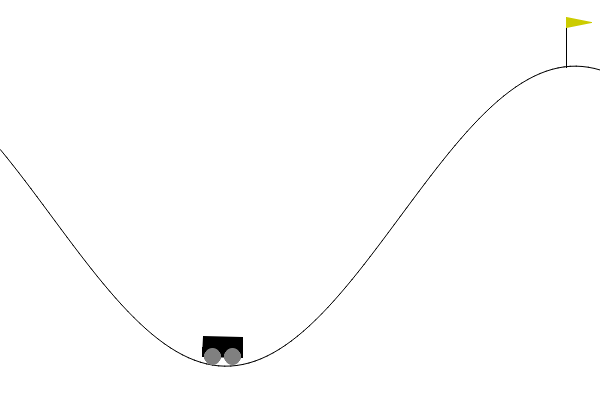

In [ ]:
# Load model and simulate
model = load_model(MODEL_PATH, input_dim=2, output_dim=3)
simulate_and_save_gif(model)

One of the graphs generated from my training process is shown below.You can run the model using the code provided below and compare your own results.

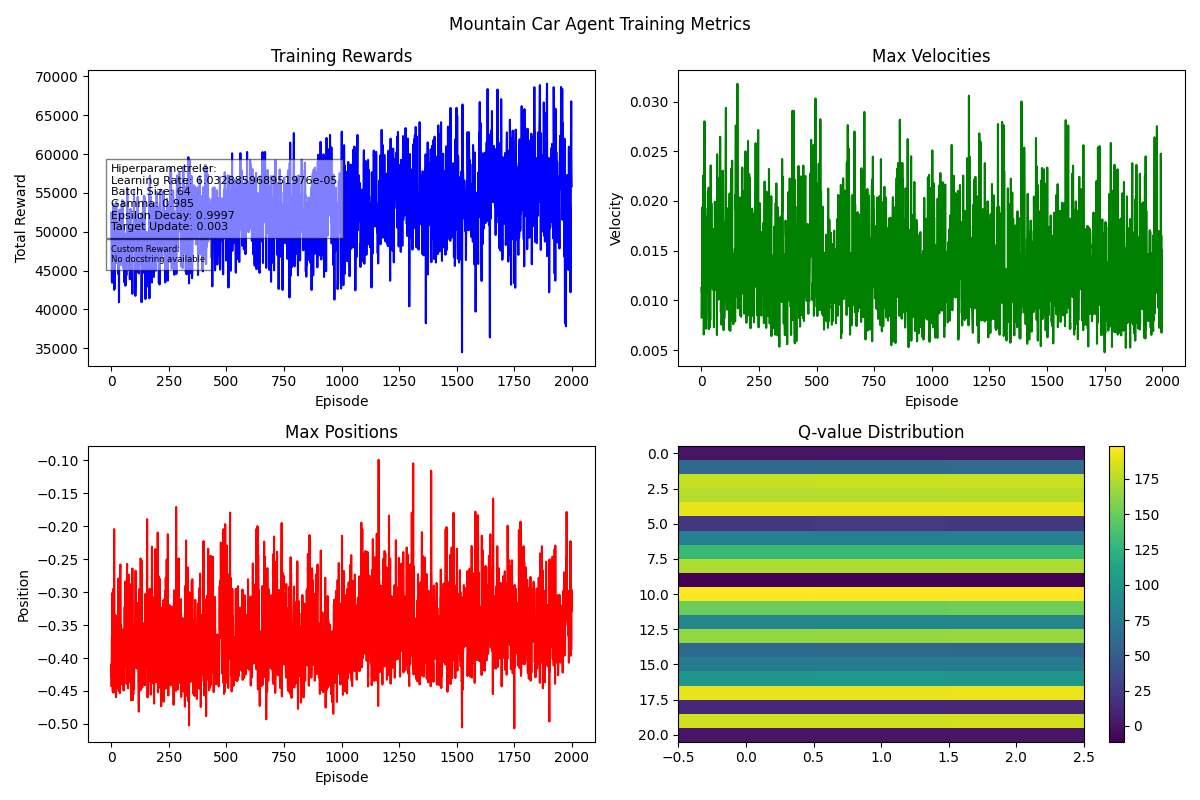

In [ ]:
png_filename = "/content/drive/MyDrive/ColabNotebooks/static/bestModel5.png"
display(Image(filename=png_filename))

You can train this model using the following script:
Since the necessary libraries were already imported in the simulation setup, here we only import:

In [ ]:
import torch.optim as optim
import matplotlib.pyplot as plt

Step 2: Training Script

```Python
======== Note: It is recommended to run this code on your local PC for better performance.========
```

Episode 1/3, Reward: 57185.7089148238
Episode 2/3, Reward: 66299.09127520381
Episode 3/3, Reward: 223823.18606785627


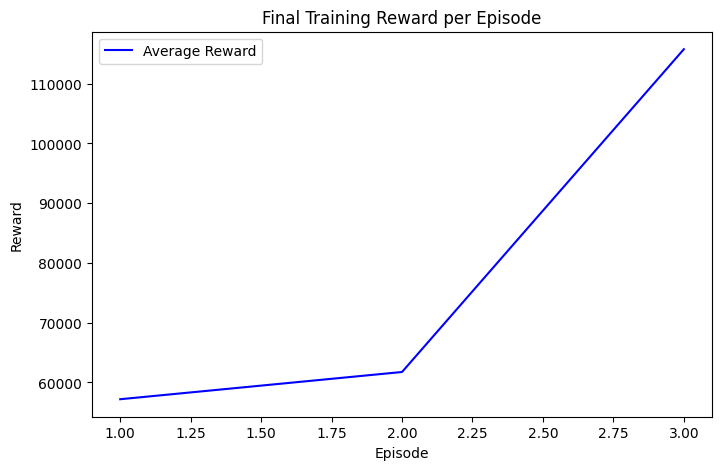

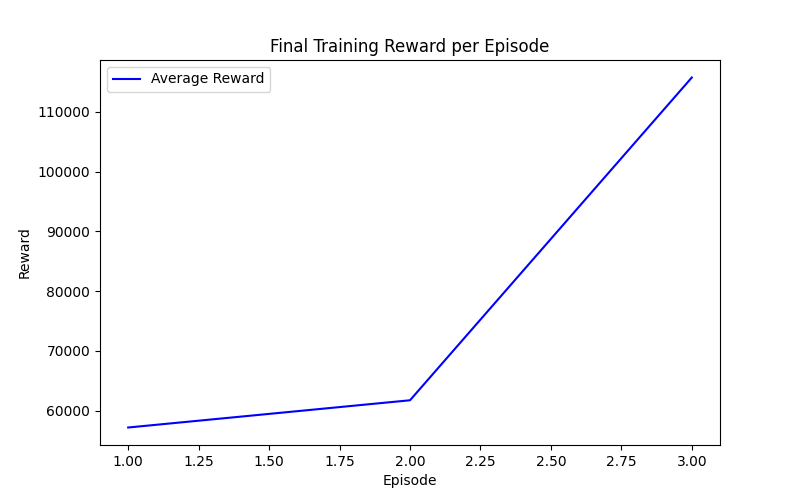

In [ ]:
# Store total rewards globally
total_rewards = []  # Initialize the reward tracking list

# Define DQN Model
class DQN(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(DQN, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(state_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, action_dim)
        )

    def forward(self, x):
        return self.network(x)

# This function encapsulates the training loop, allowing flexibility in hyperparameters
def train_mountaincar(lr=0.0002, batch_size=128, episodes=3, resume_from=None):  #Actual training increase episodes
    # Hyperparameters with explanations
    gamma = 0.99  # Discount factor - controls how much future rewards are considered
    eps_decay = 0.995  # Epsilon decay rate - how fast exploration decreases
    eps_end = 0.01  # Minimum exploration rate - ensures the model still explores a bit
    replay_buffer_size = 150000  # Size of experience replay buffer - stores past experiences for training
    target_update = 0.003  # Target network update rate - smooths learning
    save_interval = 200  # How often to save the model
    buffer_save_threshold = 10000  # Minimum buffer size before training starts

    # Resume training from the best model if available
    # It is recommended to save models periodically and select the best-performing one
    if resume_from:
        print(f"Resuming training from {resume_from}")
        model.load_state_dict(torch.load(resume_from))

    # Initialize Environment
    env = gym.make("MountainCar-v0")
    state, _ = env.reset(seed=42)
    state_dim = env.observation_space.shape[0]
    action_dim = env.action_space.n

    model = DQN(state_dim, action_dim)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.MSELoss()

    # Main Training Loop
    for episode in range(episodes):
        state, _ = env.reset()
        done = False
        total_reward = 0

        while not done:
            state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0)

            # Epsilon-greedy action selection
            if np.random.rand() < eps_decay:
                action = env.action_space.sample()
            else:
                action = model(state_tensor).max(1).indices.item()

            next_state, _, done, _, _ = env.step(action)
            position, velocity = next_state

            # Custom Reward Function
            reward = custom_reward(torch.tensor(next_state, dtype=torch.float32).unsqueeze(0), 0, done, episode)
            total_reward += reward

            # Compute target Q-value
            next_state_tensor = torch.tensor(next_state, dtype=torch.float32).unsqueeze(0)
            target_q = reward + gamma * model(next_state_tensor).max().item() * (1 - done)

            # Compute loss and update model
            current_q = model(state_tensor)[0, action]
            loss = criterion(current_q, torch.tensor(target_q, dtype=torch.float32))
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            state = next_state

            if done:
                print(f"Episode {episode + 1}/{episodes}, Reward: {total_reward}")
                total_rewards.append(total_reward)  # ✅ Ensure reward is added

    env.close()

    return total_rewards

# Custom Reward Function
def custom_reward(state, reward, done, t):
    position, velocity = state.squeeze(0)
    position, velocity = position.item(), velocity.item()

    if position >= 0.5:
        return 500.0

    position_reward = (position + 0.4) ** 2 * 150 if position >= -0.4 else 0
    velocity_reward = abs(velocity) * (60 if velocity > 0 else -10) if position >= -0.4 else abs(velocity) * (10 if velocity > 0 else -10)
    step_penalty = -0.05

    return reward + position_reward + velocity_reward + step_penalty

# **Train the Model**
train_mountaincar()  # ✅ Call training function so rewards are generated

# **Plot Training Graph**
# Ensure the final graph only appears once after training
if len(total_rewards) > 0:
    window_size = 10  # Adjust for smoothing
    avg_rewards = [np.mean(total_rewards[max(0, i - window_size):(i + 1)]) for i in range(len(total_rewards))]

    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(avg_rewards) + 1), avg_rewards, label="Average Reward", color="blue")
    plt.xlabel("Episode")
    plt.ylabel("Reward")
    plt.title("Final Training Reward per Episode")
    plt.legend()

    # Save and display the graph
    graph_filename = "/content/final_training_graph.png"
    plt.savefig(graph_filename)
    plt.show()
    display(Image(filename=graph_filename))

#  ***References***

---





* Moore, A. (1990). Efficient memory-based learning for robot control (PhD Thesis). University of Cambridge.

* The Build Fellowship. (2025). Reinforcement Learning Research. Retrieved from https://thebuildfellowship.org
*  OpenAI. (2025). ChatGPT model documentation. OpenAI. Retrieved from https://platform.openai.com


* Google. (2025). Google AI Studio documentation. Google AI. Retrieved from https://ai.google


* OpenAI. (2025). Reinforcement Learning Models & Training. Retrieved from https://platform.openai.com




Sincerely,

## Ahmet Sahiner

*Student Consultant*